## Lab 2 of calculus in one variable

This lab concerns a numerical method for solving first-order ordinary differential equations (ODEs): the forward Euler method.

In this lab you will:

* implement the forward Euler method for ODEs of the form
  `y' = ay + f(x)`
* investigate the accuracy of the method
* study the stability properties of the method
* solve a non-homogeneous ODE

We now describe the method applied to the differential equation
( `y' = ay + f(x)` ).
Let ( `x_n = x_0 + hn` ) and ( `y_n = y(x_n)` ) for ( `n = 0, \ldots, N` ).
The method is then given by:

**Forward Euler:**
[
y_{n+1} = y_n + h (a y_n + f(x_n)), \quad n = 1, \ldots, N
]

The relation above specifies how to compute ( y ) at the point ( x_{n+1} ), given that ( y ) is known at the point ( x_n ).

It turns out that the forward Euler method requires
[
|1 + ah| < 1
]
in order for the computations not to break down and to yield meaningful results. This condition is sometimes called a **stability condition**, since the behavior of the method can be described as stable or unstable.

---

## Lab 2 av envariabelanalys
Labben handlar om en numerisk metod för att lösa ordinära differentialekvationer (ODE) av första ordningen: Euler framåt.

I denna lab ska du:

implementera Euler framåt för ODE på formen y'=ay+f(x)
undersöka noggrannheten för metoden
studera metodens stabilitetsegenskaper
lösa en icke-homogen ODE
Vi beskriver nu metoden applicerad på differentialekvationen y'=ay+f(x). Låt x_n=x_0 + hn och y_n = y(x_n) för n=0, ..., N. Metoderna ges då av:

Euler framåt: y_(n+1) = y_n + h(a*y_n + f(x_n)), x = 1, ..., N

Sambandet ovan anger alltså hur man beräknar y i punkten x_(n+1) givet att man känner till y i punkten x_n.

Det visar sig att Euler framåt har kravet på sig att |1+ah|<1 för att beräkningarna inte ska haverera och för att man alls ska få något meningsfullt. Detta villkor kallas ibland för stabilitetsvillkor då beteendet för metoden kan kallas stabilt eller instabilt.

## Task 1

Implement the method in Python. It should be easy to vary the following:

* the parameter ( a )
* the function ( f )
* the starting point ( x_0 )
* the endpoint ( x_N )
* the step size ( h ), or alternatively the number of steps ( N )

The output should be able to be:

* the (approximation of) ( y(x) )
* the list of ( y )-values
* the list of ( y )-values together with the corresponding ( x )-values

depending on what you want to do later in the lab.

---

## Uppgift 1

Implementera metoden i Python. Det bör vara lätt att variera följande: parametern a, funktionen f, startpunkten x_0, slutpunkten x_N och steglängden h alternativt antal steg N. Utdata bör kunna vara (approximationen av) y(x), listan av y-värden eller listan av y-värden tillsammans med motsvarande x-värden beroende på vad du vill göra senare i labben.

In [7]:
from typing import Callable, Tuple
from numpy.typing import NDArray
import numpy as np

def euler_forward(f: Callable[[np.float64], np.float64], a: float, x_start: float, y_start: float, x_end: float, step_size: float) -> Tuple[NDArray[np.float64], NDArray[np.float64]]:
    # y_deriv = a*y + f(x)
    count: int = round((x_end - x_start) / step_size)
    x_values = np.empty(count + 1)
    y_values = np.empty(count + 1)
    x_values[0] = x_start
    y_values[0] = y_start

    for i in range(count):
        x_values[i+1] = x_values[i] + step_size
        y_values[i+1] = y_values[i] + step_size*(a*y_values[i] + f(x_values[i]))

    return x_values, y_values

print(euler_forward(lambda x: 3*x+2, 2, 0, 1, 5, 0.2))


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]), array([1.00000000e+00, 1.80000000e+00, 3.04000000e+00, 4.89600000e+00,
       7.61440000e+00, 1.15401600e+01, 1.71562240e+01, 2.51387136e+01,
       3.64341990e+01, 5.23678787e+01, 7.47950301e+01, 1.06313042e+02,
       1.50558259e+02, 2.12621563e+02, 2.99630188e+02, 4.21562263e+02,
       5.92387168e+02, 8.31662035e+02, 1.16676685e+03, 1.63603359e+03,
       2.29312702e+03, 3.21317783e+03, 4.50136897e+03, 6.30495655e+03,
       8.83009918e+03, 1.23654188e+04]))


## Task 2

We now use the method for the equation
[
y' = -2y, \quad y(0) = 1
]

1. Write down the explicit solution.

2. Use your method from Task 1 to compute ( y(5) ) using step sizes
   ( h = 0.5, 0.25, 0.125 ), and ( 0.0625 ).

3. Extend the code so that you compute the error in your approximations of ( y(5) ).
   Since the explicit solution is known, the error can be determined exactly.

4. Use the error to determine the **order of convergence** of the method.
   The method has convergence order ( p ) if the following relationship between the error ( \varepsilon(h) ) and the step size ( h ) holds:
   [
   \varepsilon = O(h^p)
   ]

Modify the code so that it generates a list containing:

* the different approximations of ( y(5) )
* the step size
* the estimated convergence order

The idea is that you compute the approximation of ( y(5) ), which we call ( y_h ), for a given value of ( h ), and then continue by doing the same for ( h/2 ), ( h/4 ), ( h/8 ), and so on.
The error in the approximation ( y_h ) can be determined exactly in this case since the explicit solution is known. The convergence order can then be estimated by

[
p_h \approx \frac{\ln(\varepsilon_h) - \ln(\varepsilon_{h/2})}{\ln(2)}
]

You should therefore generate a table containing ( h ), ( y_h ), ( \varepsilon_h ), and ( p_h ) for different values of ( h ), according to the description above, where the convergence order ( p_h ) appears to have stabilized reasonably well. A row in the table could, for example, look like this:

```
h: 0.007812: y(5) = 0.000049049558, err = 3.65e-06, rate = 1.04
```

Throughout this task, the endpoint 5 and the parameter ( a ) should be easy to vary. That is, it should be quick and simple to produce similar tables for a different final time than 5 and for a different parameter ( a ).

---

## Uppgift 2
Vi ska nu använda metoden för ekvationen y'=-2y, y(0)=1

1. Skriv upp den explicita lösningen.

2. Använd din metod från uppgift 1 för att beräkna y(5) med steglängder h=0.5, 0.25, 0.125 och 0.0625.

3. Lägg till i koden så att du bestämmer felet i dina beräkningar av y(5). Då den explicita lösningen är känd går det att bestämma felet exakt med hjälp av denna.

4. Använd felet för att bestämma konvergensordningen för metoden. Metoden har konvergensordning p om följande relation mellan felet \epsilon(h) och steglängden h råder: \epsilon = O(h^p).

Modifiera koden så att den genererar en lista med de olika närmevärderna på y(5), steglängd och uppskattad konvergensordning. Tanken är alltså att du beräknar approximationen av y(5) som vi kallar y_h för något värde på h och sedan fortsätter du och gör det för h/2, h/4, h/8 och så vidare. Felet i approximationen y_h kan i detta fall bestämmas exakt då den explicita lösningen är känd. Konvergensordningen kan sedan uppskattas genom p_h \approx (ln(\epsilon_h)-ln(\epsilon_(h/2)))/ln(2).

Du ska alltså generera en tabell som innehåller h, y_h, \epsilon_h och p_h för olika värden på h enligt ovan där konvergensordningen p_h ser ut att ha stabiliserats någorlunda. En rad i tabellen skulle t ex kunna se ut såhär:

h: 0.007812: y(5) = 0.000049049558, err = 3.65e-06, rate=1.04

I hela denna uppgift bör slutpunkten 5 och parametern a kunna varieras lätt. Dvs man bör lätt och snabbt kunna producera liknande tabeller för en annan sluttid än 5 och för en annan parameter a.

1. The explicit solution to the differential equation y'=-2y, y(0)=1 is y=1*e^(-2*x)

Den explicita lösningen till differentialekvationen y'=-2y, y(0)=1 är y=1*e^(-2*x)

2. The function from task 1 can be used to calculate

In [8]:
from numpy.typing import NDArray
from typing import List
import numpy as np

def f(x: np.float64) -> np.float64:
    return np.float64(0)

sizes: List[float] = [.5, .25, .125, .0625]

for size in sizes:
    x_values, y_values = euler_forward(f, -2, 0, 1, 5, size)
    print(f"h={size}: y(5)={y_values[-1]}")

h=0.5: y(5)=0.0
h=0.25: y(5)=9.5367431640625e-07
h=0.125: y(5)=1.0056585161637497e-05
h=0.0625: y(5)=2.2942684969866852e-05


3.

In [9]:
y_exact_5: np.float64 = np.exp(-2*5.) # y = e^(-2*5)

print(f"Exact value: y(5) = {y_exact_5}")

for size in sizes:
    x_values, y_values = euler_forward(f, -2, 0, 1, 5, size)
    y_h_5: np.float64 = y_values[-1]
    error: float = abs(y_h_5 - y_exact_5)
    print(f"h={size}: y(5) approx: {y_h_5} error: {error}")


Exact value: y(5) = 4.5399929762484854e-05
h=0.5: y(5) approx: 0.0 error: 4.5399929762484854e-05
h=0.25: y(5) approx: 9.5367431640625e-07 error: 4.4446255446078604e-05
h=0.125: y(5) approx: 1.0056585161637497e-05 error: 3.534334460084736e-05
h=0.0625: y(5) approx: 2.2942684969866852e-05 error: 2.2457244792618002e-05


4.

In [10]:
from typing import Optional

y_exact_5: np.float64 = np.exp(-2*5.) # y = e^(-2*5)

print(f"Exact value: y(5) = {y_exact_5}")

sizes = [0.25 / (2**i) for i in range(16)]
previous_error: Optional[np.float64] = None

for size in sizes:
    x_values, y_values = euler_forward(f, -2, 0, 1, 5, size)
    y_h_5: np.float64 = y_values[-1]
    error: np.float64 = abs(y_h_5 - y_exact_5)
    if previous_error is None:
        print(f"h: {size}: y(5) = {y_h_5}, err = {error}")
    else:
        error_rate: np.float64 = (np.log(error) - np.log(previous_error))/np.log(2)
        print(f"h: {size}: y(5) = {y_h_5}, err = {error}, rate = {error_rate}")
    previous_error = error



Exact value: y(5) = 4.5399929762484854e-05
h: 0.25: y(5) = 9.5367431640625e-07, err = 4.4446255446078604e-05
h: 0.125: y(5) = 1.0056585161637497e-05, err = 3.534334460084736e-05, rate = -0.33062330747997304
h: 0.0625: y(5) = 2.2942684969866852e-05, err = 2.2457244792618002e-05, rate = -0.6542576320715849
h: 0.03125: y(5) = 3.2764551235986903e-05, err = 1.263537852649795e-05, rate = -0.8297120542532824
h: 0.015625: y(5) = 3.8703386292215445e-05, err = 6.6965434702694095e-06, rate = -0.9159803623970013
h: 0.0078125: y(5) = 4.19535099121187e-05, err = 3.4464198503661575e-06, rate = -0.9583181526837126
h: 0.00390625: y(5) = 4.3651751516075024e-05, err = 1.7481782464098307e-06, rate = -0.9792461732147208
h: 0.001953125: y(5) = 4.4519544538151514e-05, err = 8.803852243333403e-07, rate = -0.9896454537738292
h: 0.0009765625: y(5) = 4.495815636603421e-05, err = 4.417733964506463e-07, rate = -0.9948283900580026
h: 0.00048828125: y(5) = 4.517864702292671e-05, err = 2.2128273955814227e-07, rate = 

Convergence rate as 1 (conceptual O(h^p)) When halving h, the error is (asymptotically) halved

## Task 3

Use the method to solve
[
y' = -2y + \sin(x), \quad y(0) = 0
]

Use ( h = 0.2 ), ( h = 0.5 ), and ( h = 2 ) to compute a solution on the interval ([0, 10]). Plot the solution for each given step size.

When does the method work well? Try varying ( h ) to find the boundary between different types of behavior.

You must be able to state where the boundary for ( h ) (or ( N )) lies according to your numerical experiments above. You must also be able to state where the boundary for ( h ) (or ( N )) should lie according to the stability condition given earlier in the introduction. You should be able to quickly produce plots like those above where the values of ( a ), ( h ) (or ( N )), and the function ( f(x) = \sin(x) ) can be varied.

---

## Uppgift 3

Använd metoden för att lösa y'=-2y+sin(x), y(0)=0.

Använd h=0.2, h=0.5 och h=2 för att få fram en lösning på intervallet [0,10]. Plotta lösningen för varje given steglängd.

När fungerar metoden bra? Prova att variera h för att hitta gränsen för olika beteenden.

Här måste du kunna svara på var gränsen för h (eller N) går enligt dina beräkningar ovan. Du måste också kunna svara på var gränsen för h (eller N) bör gå enligt stabilitetsvillkoret som är angivet ovan i introduktionen. Du skall snabbt kunna producera plottar som ovan där värdet på a och h (eller N) och funktionen f(x)=sinx kan varieras.

Size: 2.0
Size: 0.5
Size: 0.2


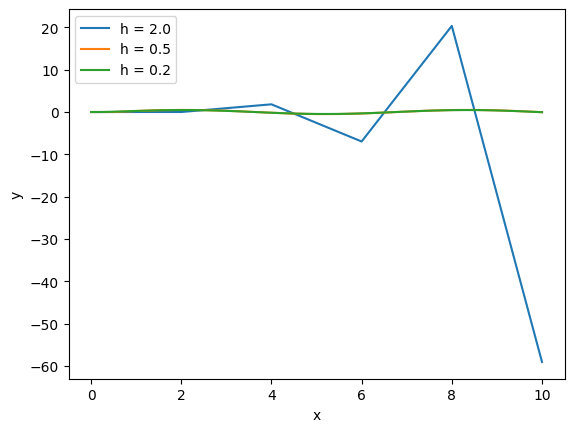

In [11]:
from numpy.typing import NDArray
import numpy as np
import matplotlib.pyplot as plt

def f(x: np.float64) -> np.float64:
    return np.sin(x)

sizes: List[float] = [2., .5, .2]

fig, ax = plt.subplots()

for size in sizes:
    x_values, y_values = euler_forward(f, -2, 0, 0, 10, size)
    print(f"Size: {size}")
    ax.plot(x_values, y_values, label=f"h = {size}")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

Varying ( h ) to find the boundary between different types of behavior

Variera h för att hitta gränsen för olika beteenden

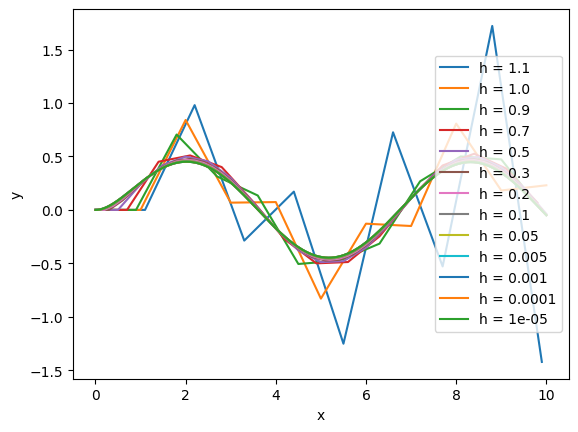

In [12]:
from numpy.typing import NDArray
import numpy as np
import matplotlib.pyplot as plt

def f(x: np.float64) -> np.float64:
    return np.sin(x)

sizes: float = [1.1, 1., .9, .7, .5, .3, .2, .1, .05, .005, .001, 1e-4, 1e-5]

fig, ax = plt.subplots()

for size in sizes:
    x_values, y_values = euler_forward(f, -2, 0, 0, 10, size)
    ax.plot(x_values, y_values, label=f"h = {size}")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

The numerical solution becomes increasingly accurate as the step size h is reduced. For small values of h, the forward Euler solution closely follows the expected behavior, while larger step sizes lead to noticeable deviations. When the stability condition `∣1+ah∣<1` is violated, the numerical solution becomes unstable

The stability condition for the forward Euler method is given by `|1 + ah| < 1`.

For the equation `y' = -2y + sin(x)` where `a = -2`:

`|1 + (-2)h| < 1`
`|1 - 2h| < 1`

This inequality can be broken down into two parts:

1. `-1 < 1 - 2h`
   `-2 < -2h`
   `1 > h` (or `h < 1`)

2. `1 - 2h < 1`
   `-2h < 0`
   `h > 0`

Combining these, the theoretical stability condition requires `0 < h < 1`.

**Numerical Experiments Observation:**

*   When `h = 2.0`, the plot clearly shows an unstable solution where the values diverge rapidly.
*   When `h = 0.5` and `h = 0.2`, the plots show stable solutions, which are within the theoretical stability range.
*   As `h` is further decreased (e.g., to `0.1`, `0.05`, `0.005`, etc.), the solutions remain stable and appear to converge towards the true solution.

Therefore, the numerical experiments are consistent with the theoretical stability condition, indicating that the boundary for `h` is `h = 1`. For step sizes `h >= 1`, the method is unstable, and for `0 < h < 1`, it is stable.